<a href="https://colab.research.google.com/github/XM2202-02/CHECK-OK-NG/blob/main/CHECK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 85.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━ 347.7/664.8 MB 132.4 MB/s eta 0:00:03ERROR: Operation cancelled by user
   ━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━ 349.3/664.8 MB 119.2 MB/s eta 0:00:03


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

def train_model(data_path, model_path):
    datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.2
    )

    train_generator = datagen.flow_from_directory(
        data_path,
        target_size=(224, 224),
        batch_size=8,
        class_mode='binary',
        subset='training'
    )

    val_generator = datagen.flow_from_directory(
        data_path,
        target_size=(224, 224),
        batch_size=8,
        class_mode='binary',
        subset='validation'
    )

    model = Sequential([
        Conv2D(16, (3,3), activation='relu', input_shape=(224,224,3)),
        MaxPooling2D(2,2),
        Conv2D(32, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    callbacks = [
        EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
        ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True)
    ]

    model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=30,
        callbacks=callbacks
    )

    return model


In [29]:
cap_model = train_model('/content/drive/MyDrive/CHECK/CAP', '/content/drive/MyDrive/CHECK/cap_model.h5')
label_model = train_model('/content/drive/MyDrive/CHECK/LABEL', '/content/drive/MyDrive/CHECK/label_model.h5')
water_model = train_model('/content/drive/MyDrive/CHECK/WATER', '/content/drive/MyDrive/CHECK/water_model.h5')


Found 158 images belonging to 2 classes.
Found 38 images belonging to 2 classes.
Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - accuracy: 0.7933 - loss: 0.9318

20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 471ms/step - accuracy: 0.7978 - loss: 0.9112 - val_accuracy: 0.9737 - val_loss: 0.0316
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.9793 - loss: 0.0424

20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 308ms/step - accuracy: 0.9797 - loss: 0.0416 - val_accuracy: 1.0000 - val_loss: 0.0041
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 331ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 0.0245
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 299ms/step - accuracy: 0.9706 - loss: 0.0650 - val_accuracy: 1.0000 - val_loss: 0.0107
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step - accuracy: 0.9978 - loss: 0.0099

20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 359ms/step - accuracy: 0.9976 - loss: 0.0102 - val_accuracy: 1.0000 - val_loss: 6.1452e-04
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - accuracy: 1.0000 - loss: 0.0043

20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 352ms/step - accuracy: 1.0000 - loss: 0.0043 - val_accuracy: 1.0000 - val_loss: 1.2475e-06
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 290ms/step - accuracy: 1.0000 - loss: 5.4980e-04 - val_accuracy: 1.0000 - val_loss: 1.8231e-06
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - accuracy: 1.0000 - loss: 1.8517e-04

20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 381ms/step - accuracy: 1.0000 - loss: 1.8856e-04 - val_accuracy: 1.0000 - val_loss: 8.0544e-07
Epoch 9/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - accuracy: 1.0000 - loss: 1.3211e-05

20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 316ms/step - accuracy: 1.0000 - loss: 1.3224e-05 - val_accuracy: 1.0000 - val_loss: 5.8051e-07
Epoch 10/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - accuracy: 1.0000 - loss: 2.8149e-05

20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 343ms/step - accuracy: 1.0000 - loss: 2.7881e-05 - val_accuracy: 1.0000 - val_loss: 4.2153e-07
Epoch 11/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - accuracy: 1.0000 - loss: 3.8508e-06

20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 322ms/step - accuracy: 1.0000 - loss: 3.8178e-06 - val_accuracy: 1.0000 - val_loss: 4.0232e-07
Epoch 12/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 1.0000 - loss: 2.5407e-05

20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 355ms/step - accuracy: 1.0000 - loss: 2.4767e-05 - val_accuracy: 1.0000 - val_loss: 3.9607e-07
Epoch 13/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step - accuracy: 1.0000 - loss: 1.4349e-05

20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 324ms/step - accuracy: 1.0000 - loss: 1.4423e-05 - val_accuracy: 1.0000 - val_loss: 3.7412e-07
Epoch 14/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step - accuracy: 1.0000 - loss: 2.3543e-05

20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 312ms/step - accuracy: 1.0000 - loss: 2.2811e-05 - val_accuracy: 1.0000 - val_loss: 3.1319e-07
Epoch 15/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 338ms/step - accuracy: 1.0000 - loss: 1.9818e-05 - val_accuracy: 1.0000 - val_loss: 1.1951e-06
Epoch 16/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 285ms/step - accuracy: 1.0000 - loss: 1.0355e-04 - val_accuracy: 1.0000 - val_loss: 6.8788e-07
Epoch 17/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 349ms/step - accuracy: 1.0000 - loss: 2.0577e-05 - val_accuracy: 1.0000 - val_loss: 3.5979e-07
Epoch 18/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - accuracy: 1.0000 - loss: 2.5145e-05

20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 293ms/step - accuracy: 1.0000 - loss: 2.4810e-05 - val_accuracy: 1.0000 - val_loss: 2.2584e-07
Epoch 19/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - accuracy: 1.0000 - loss: 2.4881e-05

20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 342ms/step - accuracy: 1.0000 - loss: 2.5725e-05 - val_accuracy: 1.0000 - val_loss: 1.1836e-07
Epoch 20/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - accuracy: 1.0000 - loss: 7.3592e-07

20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 360ms/step - accuracy: 1.0000 - loss: 7.8485e-07 - val_accuracy: 1.0000 - val_loss: 9.1206e-08
Epoch 21/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - accuracy: 1.0000 - loss: 5.5094e-06

20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 327ms/step - accuracy: 1.0000 - loss: 5.5930e-06 - val_accuracy: 1.0000 - val_loss: 8.0670e-08
Epoch 22/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 1.0000 - loss: 4.5092e-06

20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 297ms/step - accuracy: 1.0000 - loss: 4.9995e-06 - val_accuracy: 1.0000 - val_loss: 6.5226e-08
Epoch 23/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - accuracy: 1.0000 - loss: 1.9093e-06

20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 299ms/step - accuracy: 1.0000 - loss: 1.8918e-06 - val_accuracy: 1.0000 - val_loss: 5.6785e-08
Epoch 24/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step - accuracy: 1.0000 - loss: 1.0299e-06

20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 337ms/step - accuracy: 1.0000 - loss: 1.0980e-06 - val_accuracy: 1.0000 - val_loss: 5.3929e-08
Epoch 25/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - accuracy: 1.0000 - loss: 1.3661e-05

20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 336ms/step - accuracy: 1.0000 - loss: 1.3489e-05 - val_accuracy: 1.0000 - val_loss: 4.5066e-08
Epoch 26/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 1.0000 - loss: 3.5790e-06

20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 301ms/step - accuracy: 1.0000 - loss: 3.9229e-06 - val_accuracy: 1.0000 - val_loss: 4.0071e-08
Epoch 27/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 346ms/step - accuracy: 1.0000 - loss: 5.6705e-05 - val_accuracy: 1.0000 - val_loss: 1.3813e-07
Epoch 28/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 283ms/step - accuracy: 1.0000 - loss: 2.6638e-06 - val_accuracy: 1.0000 - val_loss: 4.3433e-07
Epoch 29/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 345ms/step - accuracy: 1.0000 - loss: 9.6494e-05 - val_accuracy: 1.0000 - val_loss: 1.1583e-07
Epoch 30/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 289ms/step - accuracy: 1.0000 - loss: 4.2647e-06 - val_accuracy: 1.0000 - val_loss: 8.8554e-08
Found 119 images belonging to 2 classes.
Found 29 images belonging to 2 classes.
Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step - accuracy: 0.7236 - loss: 0.7652

15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 550ms/step - accuracy: 0.7293 - loss: 0.7459 - val_accuracy: 1.0000 - val_loss: 0.0161
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - accuracy: 1.0000 - loss: 0.0122

15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 319ms/step - accuracy: 1.0000 - loss: 0.0121 - val_accuracy: 1.0000 - val_loss: 3.9893e-04
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step - accuracy: 1.0000 - loss: 0.0011

15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 414ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 2.2308e-05
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step - accuracy: 1.0000 - loss: 5.5005e-04

15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 328ms/step - accuracy: 1.0000 - loss: 5.3830e-04 - val_accuracy: 1.0000 - val_loss: 1.8690e-06
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 322ms/step - accuracy: 1.0000 - loss: 1.4861e-04 - val_accuracy: 1.0000 - val_loss: 1.9540e-06
Epoch 6/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step - accuracy: 1.0000 - loss: 2.9889e-05

15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 350ms/step - accuracy: 1.0000 - loss: 2.9557e-05 - val_accuracy: 1.0000 - val_loss: 9.3627e-07
Epoch 7/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 380ms/step - accuracy: 1.0000 - loss: 2.2354e-04 - val_accuracy: 1.0000 - val_loss: 1.7720e-05
Epoch 8/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 283ms/step - accuracy: 1.0000 - loss: 6.5654e-04 - val_accuracy: 1.0000 - val_loss: 8.0235e-06
Epoch 9/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 305ms/step - accuracy: 1.0000 - loss: 5.5918e-05 - val_accuracy: 1.0000 - val_loss: 6.5394e-05
Epoch 10/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 372ms/step - accuracy: 1.0000 - loss: 1.4239e-05 - val_accuracy: 1.0000 - val_loss: 6.3250e-06
Epoch 11/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 296ms/step - accuracy: 1.0000 - loss: 5.5188e-06 - val_accuracy: 1.0000 - val_loss: 1.2980e-06
Found 171 images belonging to 2 classes.
Found 42 images belonging to 2 classes.
Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - accuracy: 0.8269 - loss: 0.7309

22/22 ━━━━━━━━━━━━━━━━━━━━ 12s 423ms/step - accuracy: 0.8293 - loss: 0.7193 - val_accuracy: 0.8810 - val_loss: 0.1928
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step - accuracy: 0.9810 - loss: 0.0739

22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 325ms/step - accuracy: 0.9813 - loss: 0.0730 - val_accuracy: 0.9524 - val_loss: 0.0769
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 1.0000 - loss: 0.0100

22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 296ms/step - accuracy: 1.0000 - loss: 0.0100 - val_accuracy: 1.0000 - val_loss: 0.0112
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - accuracy: 1.0000 - loss: 0.0028

22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 304ms/step - accuracy: 1.0000 - loss: 0.0029 - val_accuracy: 1.0000 - val_loss: 0.0073
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 336ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 0.0278
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - accuracy: 0.9955 - loss: 0.0334

22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 330ms/step - accuracy: 0.9949 - loss: 0.0361 - val_accuracy: 1.0000 - val_loss: 0.0072
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 310ms/step - accuracy: 0.9595 - loss: 0.1072 - val_accuracy: 1.0000 - val_loss: 0.0358
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step - accuracy: 1.0000 - loss: 0.0033

22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 383ms/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 1.0000 - val_loss: 0.0037
Epoch 9/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - accuracy: 0.9992 - loss: 0.0015

22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 323ms/step - accuracy: 0.9989 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 10/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - accuracy: 1.0000 - loss: 0.0013

22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 354ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 11/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step - accuracy: 1.0000 - loss: 9.8121e-04

22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 312ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 12/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - accuracy: 1.0000 - loss: 2.0886e-04

22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 304ms/step - accuracy: 1.0000 - loss: 2.1543e-04 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 13/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step - accuracy: 1.0000 - loss: 1.7402e-04

22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 304ms/step - accuracy: 1.0000 - loss: 1.7494e-04 - val_accuracy: 1.0000 - val_loss: 9.0544e-04
Epoch 14/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 1.0000 - loss: 7.6706e-05

22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 349ms/step - accuracy: 1.0000 - loss: 7.6181e-05 - val_accuracy: 1.0000 - val_loss: 8.5296e-04
Epoch 15/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step - accuracy: 1.0000 - loss: 5.5182e-04

22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 328ms/step - accuracy: 1.0000 - loss: 5.6683e-04 - val_accuracy: 1.0000 - val_loss: 7.4535e-04
Epoch 16/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - accuracy: 1.0000 - loss: 3.9982e-04

22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 331ms/step - accuracy: 1.0000 - loss: 4.2122e-04 - val_accuracy: 1.0000 - val_loss: 6.0320e-04
Epoch 17/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 1.0000 - loss: 0.0012

22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 359ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 4.3863e-04
Epoch 18/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step - accuracy: 1.0000 - loss: 3.2799e-04

22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 367ms/step - accuracy: 1.0000 - loss: 3.2631e-04 - val_accuracy: 1.0000 - val_loss: 4.0541e-04
Epoch 19/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 297ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 4.2564e-04
Epoch 20/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 357ms/step - accuracy: 1.0000 - loss: 6.1118e-04 - val_accuracy: 1.0000 - val_loss: 4.1152e-04
Epoch 21/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - accuracy: 1.0000 - loss: 2.3661e-04

22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 322ms/step - accuracy: 1.0000 - loss: 2.3894e-04 - val_accuracy: 1.0000 - val_loss: 3.8653e-04
Epoch 22/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step - accuracy: 1.0000 - loss: 0.0082

22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 313ms/step - accuracy: 1.0000 - loss: 0.0081 - val_accuracy: 1.0000 - val_loss: 2.6763e-04
Epoch 23/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step - accuracy: 1.0000 - loss: 7.2108e-04

22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 335ms/step - accuracy: 1.0000 - loss: 7.0345e-04 - val_accuracy: 1.0000 - val_loss: 1.9050e-04
Epoch 24/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 353ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 3.7772e-04
Epoch 25/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 303ms/step - accuracy: 1.0000 - loss: 6.5965e-05 - val_accuracy: 1.0000 - val_loss: 3.9807e-04
Epoch 26/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - accuracy: 1.0000 - loss: 0.0014

22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 369ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 7.6478e-05
Epoch 27/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step - accuracy: 1.0000 - loss: 1.3170e-04

22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 353ms/step - accuracy: 1.0000 - loss: 1.3015e-04 - val_accuracy: 1.0000 - val_loss: 5.7224e-05
Epoch 28/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - accuracy: 1.0000 - loss: 0.0016

22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 304ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 4.8126e-05
Epoch 29/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 1.0000 - loss: 1.7380e-04

22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 350ms/step - accuracy: 1.0000 - loss: 1.6922e-04 - val_accuracy: 1.0000 - val_loss: 4.0370e-05
Epoch 30/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - accuracy: 1.0000 - loss: 3.0472e-04

22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 361ms/step - accuracy: 1.0000 - loss: 2.9806e-04 - val_accuracy: 1.0000 - val_loss: 3.7581e-05


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
⛔ Chai nước KHÔNG ĐẠT yêu cầu:
❌ Nắp chai lỗi
❌ Nhãn chai lỗi
❌ Mực nước lỗi


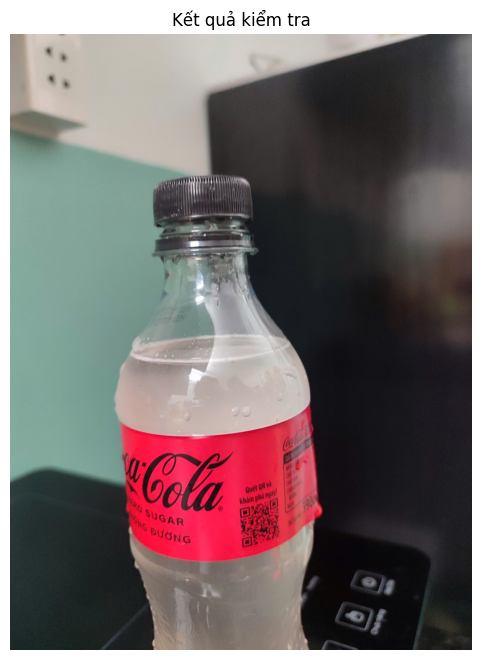

In [9]:
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import numpy as np

cap_model = load_model('/content/drive/MyDrive/CHECK/cap_model.h5')
label_model = load_model('/content/drive/MyDrive/CHECK/label_model.h5')
water_model = load_model('/content/drive/MyDrive/CHECK/water_model.h5')

image_path = '/content/drive/MyDrive/CHECK/CAP/NG/z6557925377721_f2393351647930140dbfeab4124c118f.jpg'
image = cv2.imread(image_path)
img = cv2.resize(image, (224, 224))
img = img / 255.0
img = img.reshape(1, 224, 224, 3)

cap_pred = cap_model.predict(img)[0][0]
label_pred = label_model.predict(img)[0][0]
water_pred = water_model.predict(img)[0][0]

errors = []
if cap_pred < 0.5: errors.append("❌ Nắp chai lỗi")
if label_pred < 0.5: errors.append("❌ Nhãn chai lỗi")
if water_pred < 0.5: errors.append("❌ Mực nước lỗi")
if not errors:
    print("✅ Chai nước ĐẠT yêu cầu")
else:
    print("⛔ Chai nước KHÔNG ĐẠT yêu cầu:")
    for err in errors:
        print(err)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 8))
plt.imshow(image_rgb)
plt.axis('off')
plt.title("Kết quả kiểm tra")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
✅ Chai nước ĐẠT yêu cầu


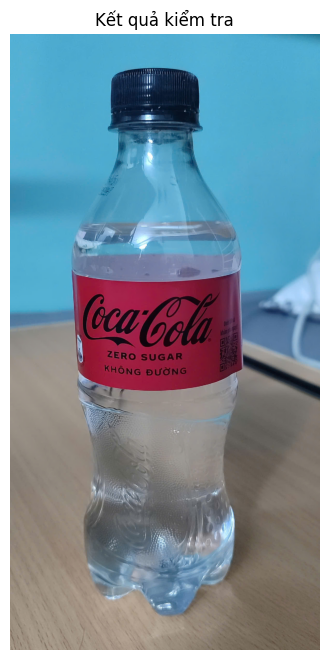

In [17]:
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import numpy as np

cap_model = load_model('/content/drive/MyDrive/CHECK/cap_model.h5')
label_model = load_model('/content/drive/MyDrive/CHECK/label_model.h5')
water_model = load_model('/content/drive/MyDrive/CHECK/water_model.h5')
image_path = '/content/Test D.jpg'
image = cv2.imread(image_path)
img = cv2.resize(image, (224, 224))
img = img / 255.0
img = img.reshape(1, 224, 224, 3)

cap_pred = cap_model.predict(img)[0][0]
label_pred = label_model.predict(img)[0][0]
water_pred = water_model.predict(img)[0][0]

errors = []
if cap_pred < 0.5: errors.append("❌ Nắp chai lỗi")
if label_pred < 0.5: errors.append("❌ Nhãn chai lỗi")
if water_pred < 0.5: errors.append("❌ Mực nước lỗi")
if not errors:
    print("✅ Chai nước ĐẠT yêu cầu")
else:
    print("⛔ Chai nước KHÔNG ĐẠT yêu cầu:")
    for err in errors:
        print(err)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 8))
plt.imshow(image_rgb)
plt.axis('off')
plt.title("Kết quả kiểm tra")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
⛔ Chai nước KHÔNG ĐẠT yêu cầu:
❌ Nắp chai lỗi
❌ Nhãn chai lỗi
❌ Mực nước lỗi


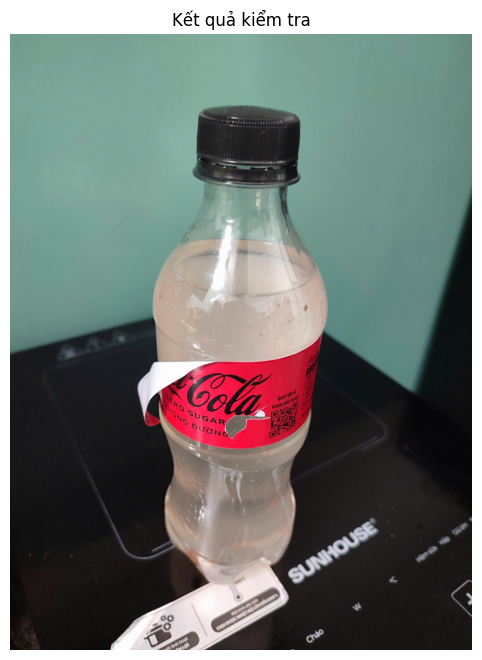

In [30]:
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import numpy as np

cap_model = load_model('/content/drive/MyDrive/CHECK/cap_model.h5')
label_model = load_model('/content/drive/MyDrive/CHECK/label_model.h5')
water_model = load_model('/content/drive/MyDrive/CHECK/water_model.h5')
image_path = '/content/TEST NO D.jpg'
image = cv2.imread(image_path)
img = cv2.resize(image, (224, 224))
img = img / 255.0
img = img.reshape(1, 224, 224, 3)

cap_pred = cap_model.predict(img)[0][0]
label_pred = label_model.predict(img)[0][0]
water_pred = water_model.predict(img)[0][0]

errors = []
if cap_pred < 0.5: errors.append("❌ Nắp chai lỗi")
if label_pred < 1.1: errors.append("❌ Nhãn chai lỗi")
if water_pred < 0.1: errors.append("❌ Mực nước lỗi")

if not errors:
    print("✅ Chai nước ĐẠT yêu cầu")
else:
    print("⛔ Chai nước KHÔNG ĐẠT yêu cầu:")
    for err in errors:
        print(err)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 8))
plt.imshow(image_rgb)
plt.axis('off')
plt.title("Kết quả kiểm tra")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
⛔ Chai nước KHÔNG ĐẠT yêu cầu:
❌ Nắp chai lỗi
❌ Nhãn chai lỗi
❌ Mực nước lỗi


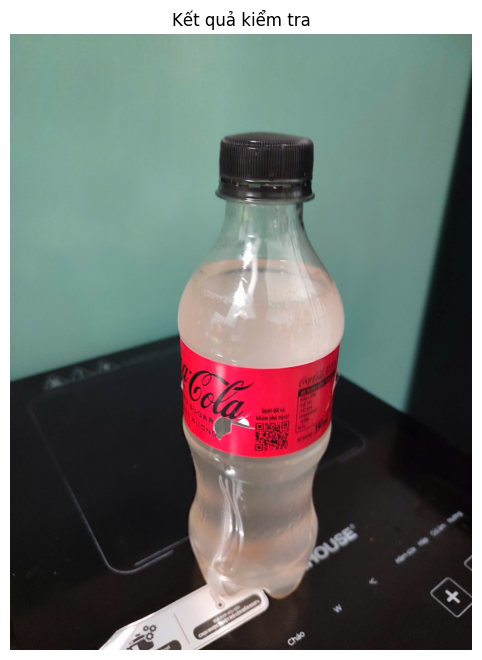

In [40]:
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import numpy as np

cap_model = load_model('/content/drive/MyDrive/CHECK/cap_model.h5')
label_model = load_model('/content/drive/MyDrive/CHECK/label_model.h5')
water_model = load_model('/content/drive/MyDrive/CHECK/water_model.h5')
image_path = '/content/test no.jpg'
image = cv2.imread(image_path)
img = cv2.resize(image, (224, 224))
img = img / 255.0
img = img.reshape(1, 224, 224, 3)
cap_pred = cap_model.predict(img)[0][0]
label_pred = label_model.predict(img)[0][0]
water_pred = water_model.predict(img)[0][0]

errors = []
if cap_pred < 0.5: errors.append("❌ Nắp chai lỗi")
if label_pred < 0.5: errors.append("❌ Nhãn chai lỗi")
if water_pred < 0.5: errors.append("❌ Mực nước lỗi")
if not errors:
    print("✅ Chai nước ĐẠT yêu cầu")
else:
    print("⛔ Chai nước KHÔNG ĐẠT yêu cầu:")
    for err in errors:
        print(err)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 8))
plt.imshow(image_rgb)
plt.axis('off')
plt.title("Kết quả kiểm tra")
plt.show()